In [2]:
#%reset
# import packages
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
sns.set()
import re
warnings.filterwarnings('ignore')
from pylab import *
sns.set()
# pip3 install -U scikit-learn scipy matplotlib
def jitter(values,j):
    return values + np.random.normal(j,0.01,values.shape)
from PIL import Image, ImageDraw

import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from IPython.display import Image
import requests
import urllib

# https://github.com/hcji/PyFingerprint
# pip install git+https://github.com/EBjerrum/molvecgen	
# conda install -c conda-forge/label/main openbabel
# pip install git+https://github.com/hcji/PyFingerprint.git

In [3]:
df_features = pd.read_csv('../data/solutions-data/global_importance_summery_20221206.csv', encoding ='utf8' , engine='python')
df_features_top10 = pd.read_csv('../data/solutions-data/global_importance_summery_top10_20221206.csv', encoding ='utf8' , engine='python')
df_features_id = pd.read_csv('../data/solutions-data/global_importance_summery_20221206_id.csv', encoding ='utf8' , engine='python')
df_features_top10_id = pd.read_csv('../data/solutions-data/global_importance_summary_top10_20221208_id.csv', encoding ='utf8' , engine='python')
print(df_features_top10_id.head(3))

                                        Feature mech      dir  gi_mean  \
0  c(:c:c:c(:c1)[CH0](~[!#1])(~[!#1])~[!#1]):c1   AR  agonist     0.51   
1                                      SubFP302   AR  agonist     0.23   
2                                     MACCSFP84   AR  agonist     0.26   

   gi_max  gi_std  gi_count    mech_dir  absoluteIndex  relativeIndex  \
0    1.86    0.61        13  AR_agonist           8236           3368   
1    1.81    0.49        13  AR_agonist            356            142   
2    1.70    0.54        13  AR_agonist            445            207   

                                      description  \
0    c(:c:c:c(:c1)[CH0](~[!#1])(~[!#1])~[!#1]):c1   
1  [!$(*#*)&!D1]-!@[!$(*#*)&!D1] (Rotatable_bond)   
2                                           [NH2]   

                                         smirks  \
0  c(:c:c:c(:c1)[CH0](~[!#1])(~[!#1])~[!#1]):c1   
1                 [!$(*#*)&!D1]-!@[!$(*#*)&!D1]   
2                                         [N

In [4]:
df_features_top10_id.shape

(121, 15)

<Figure size 504x360 with 0 Axes>

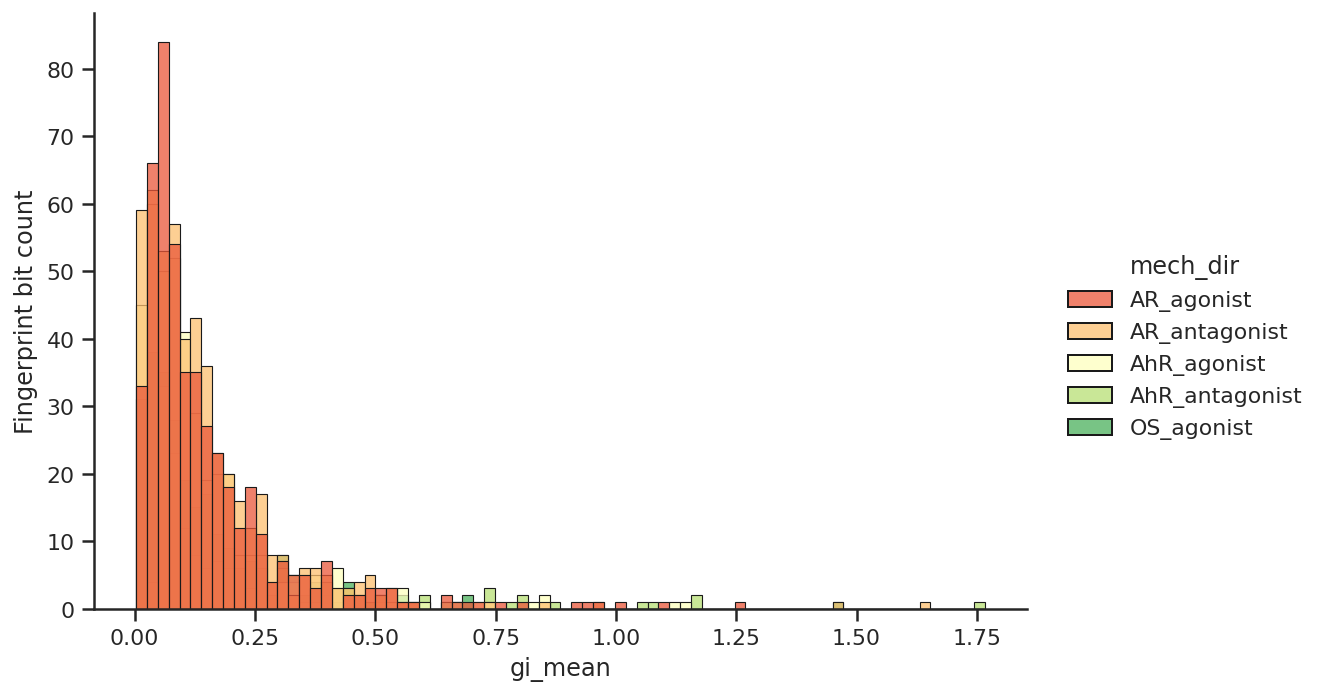

In [5]:
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.displot(data=df_features, x='gi_mean', palette="RdYlGn",
            height=5, aspect=1.5, alpha = 0.75, edgecolor="k", hue='mech_dir')
g.set(xlabel='Global importance value', ylabel='Fingerprint bit count')
plt.savefig('../plots/solutions/globalfeatureimportance1.svg', bbox_inches = 'tight', dpi=300)

<Figure size 504x360 with 0 Axes>

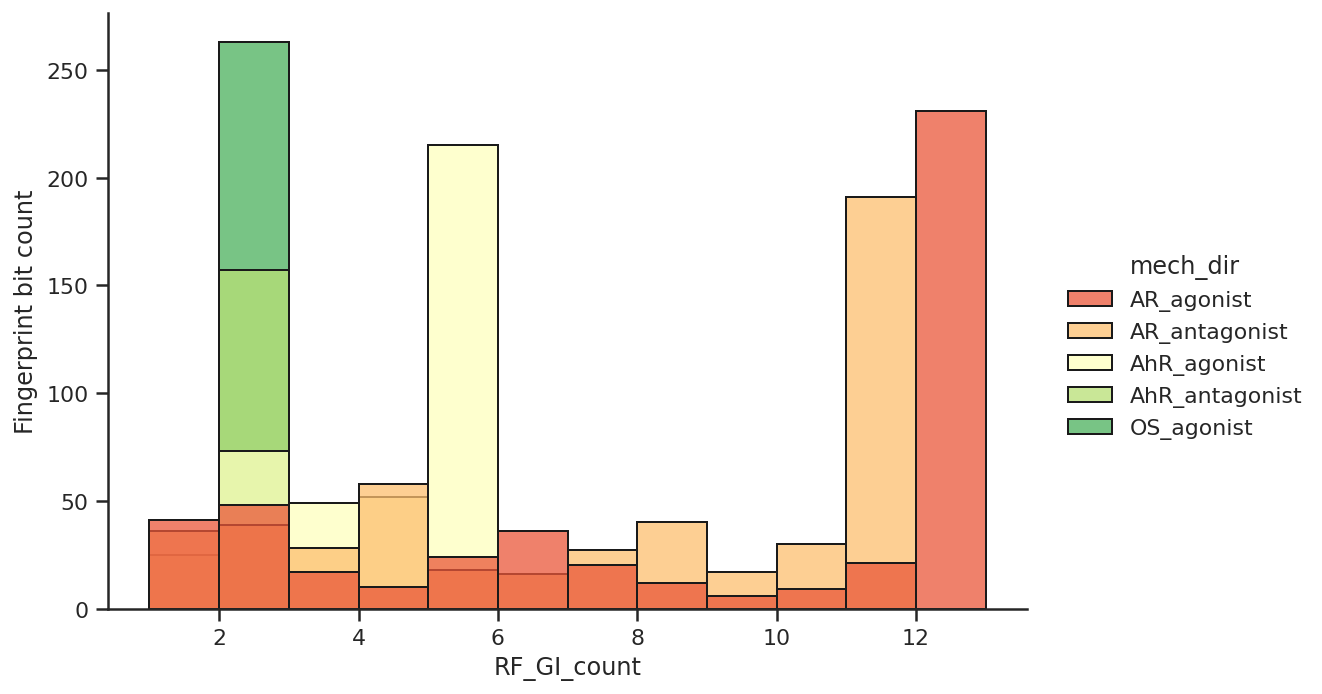

In [60]:
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.displot(data=df_features, x='gi_count', palette="RdYlGn",
            height=5, aspect=1.5, alpha = 0.75, edgecolor="k", hue='mech_dir')
g.set(xlabel='Endpoint count', ylabel='Fingerprint bit count')
plt.savefig('../plots/solutions/globalfeatureimportance2.svg',bbox_inches='tight', dpi=300)

<Figure size 504x360 with 0 Axes>

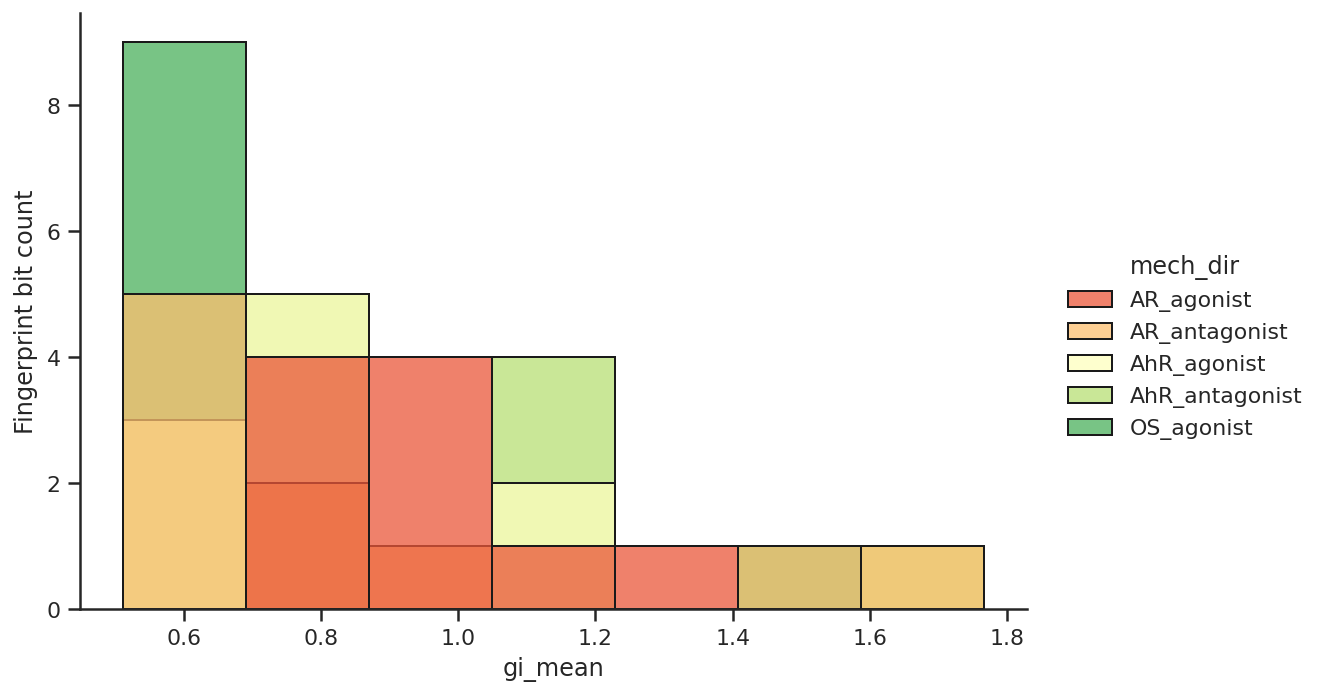

In [61]:
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.displot(data=df_features_top10, x='gi_mean', palette="RdYlGn",
            height=5, aspect=1.5, alpha = 0.75, edgecolor="k", hue='mech_dir')
g.set(xlabel='gi_mean', ylabel='Fingerprint bit count')
#plt.savefig('../plots/solutions/fingerprint_bit_count_mean.svg', bbox_inches = 'tight', dpi=300)

In [ ]:
baseurl = "https://smarts.plus/smartsview/download_rest?"
def get_img(query):
    url = baseurl+query
    res = requests.get(url)
    return Image(res.content)
im1 = get_img("smarts=[CX3](=[OX1])[OX2][CX3](=[OX1])")
im1

In [109]:
df_features_top10_id.sort_values(by="mech_dir")
df_features_top10_id.smirks.nunique()
smarts = df_features_top10_id.smirks
print(smarts[5])
print(df_features_top10_id.iloc[[5]].description)
df_features_top10_id.iloc[[5]]
df_features_top10_id.head(25)

[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]
5    [CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;...
Name: description, dtype: object


,Feature,mech,dir,gi_mean,gi_max,gi_std,gi_count,mech_dir,absoluteIndex,relativeIndex,description,smirks,rdkit,Iteration,ID
0,c(:c:c:c(:c1)[CH0](~[!#1])(~[!#1])~[!#1]):c1,AR,agonist,0.51,1.86,0.61,13,AR_agonist,8236,3368,c(:c:c:c(:c1)[CH0](~[!#1])(~[!#1])~[!#1]):c1,c(:c:c:c(:c1)[CH0](~[!#1])(~[!#1])~[!#1]):c1,c(:c:c:c(:c1)[CH0](~[!#1])(~[!#1])~[!#1]):c1,0,id1
1,SubFP302,AR,agonist,0.23,1.81,0.49,13,AR_agonist,356,142,[!$(*#*)&!D1]-!@[!$(*#*)&!D1] (Rotatable_bond),[!$(*#*)&!D1]-!@[!$(*#*)&!D1],[!$(*#*)&!D1]-!@[!$(*#*)&!D1],0,id2
2,MACCSFP84,AR,agonist,0.26,1.70,0.54,13,AR_agonist,445,207,[NH2],[NH2],[NH2],0,id3
3,PubchemFP776,AR,agonist,0.28,1.62,0.44,13,AR_agonist,1304,711,[#6][#6]1[#6][#6][#6]([#6])[#6][#6]1 (CC1CCC(C...,[#6][#6]1[#6][#6][#6]([#6])[#6][#6]1,[#6][#6]1[#6][#6][#6]([#6])[#6][#6]1,0,id4
4,OB34,AR,agonist,0.16,1.56,0.43,13,AR_agonist,33,16,c[OH] (34 phenol),c[OH],c[OH],0,id5
5,SubFP5,AR,agonist,0.25,1.53,0.42,13,AR_agonist,59,38,"[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;...","[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;...","[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;...",0,id6
6,KRFP18,AR,agonist,0.52,1.52,0.51,13,AR_agonist,1426,755,[!#1][CH]([!#1])C([!#1])([!#1])[!#1],[!#1][CH]([!#1])C([!#1])([!#1])[!#1],[!#1][CH]([!#1])C([!#1])([!#1])[!#1],0,id7
7,KRFP3733,AR,agonist,0.20,1.49,0.42,13,AR_agonist,5141,1428,CCCCN,CCCCN,CCCCN,0,id8
8,PubchemFP756,AR,agonist,0.22,1.43,0.39,13,AR_agonist,1284,701,[#6]c1c([#8])cccc1 (Cc1c(O)cccc1),[#6]c1c([#8])cccc1,[#6]c1c([#8])cccc1,0,id9
9,KRFP3150,AR,agonist,0.31,1.38,0.41,13,AR_agonist,4558,1208,C1CCCCC1,C1CCCCC1,C1CCCCC1,0,id10


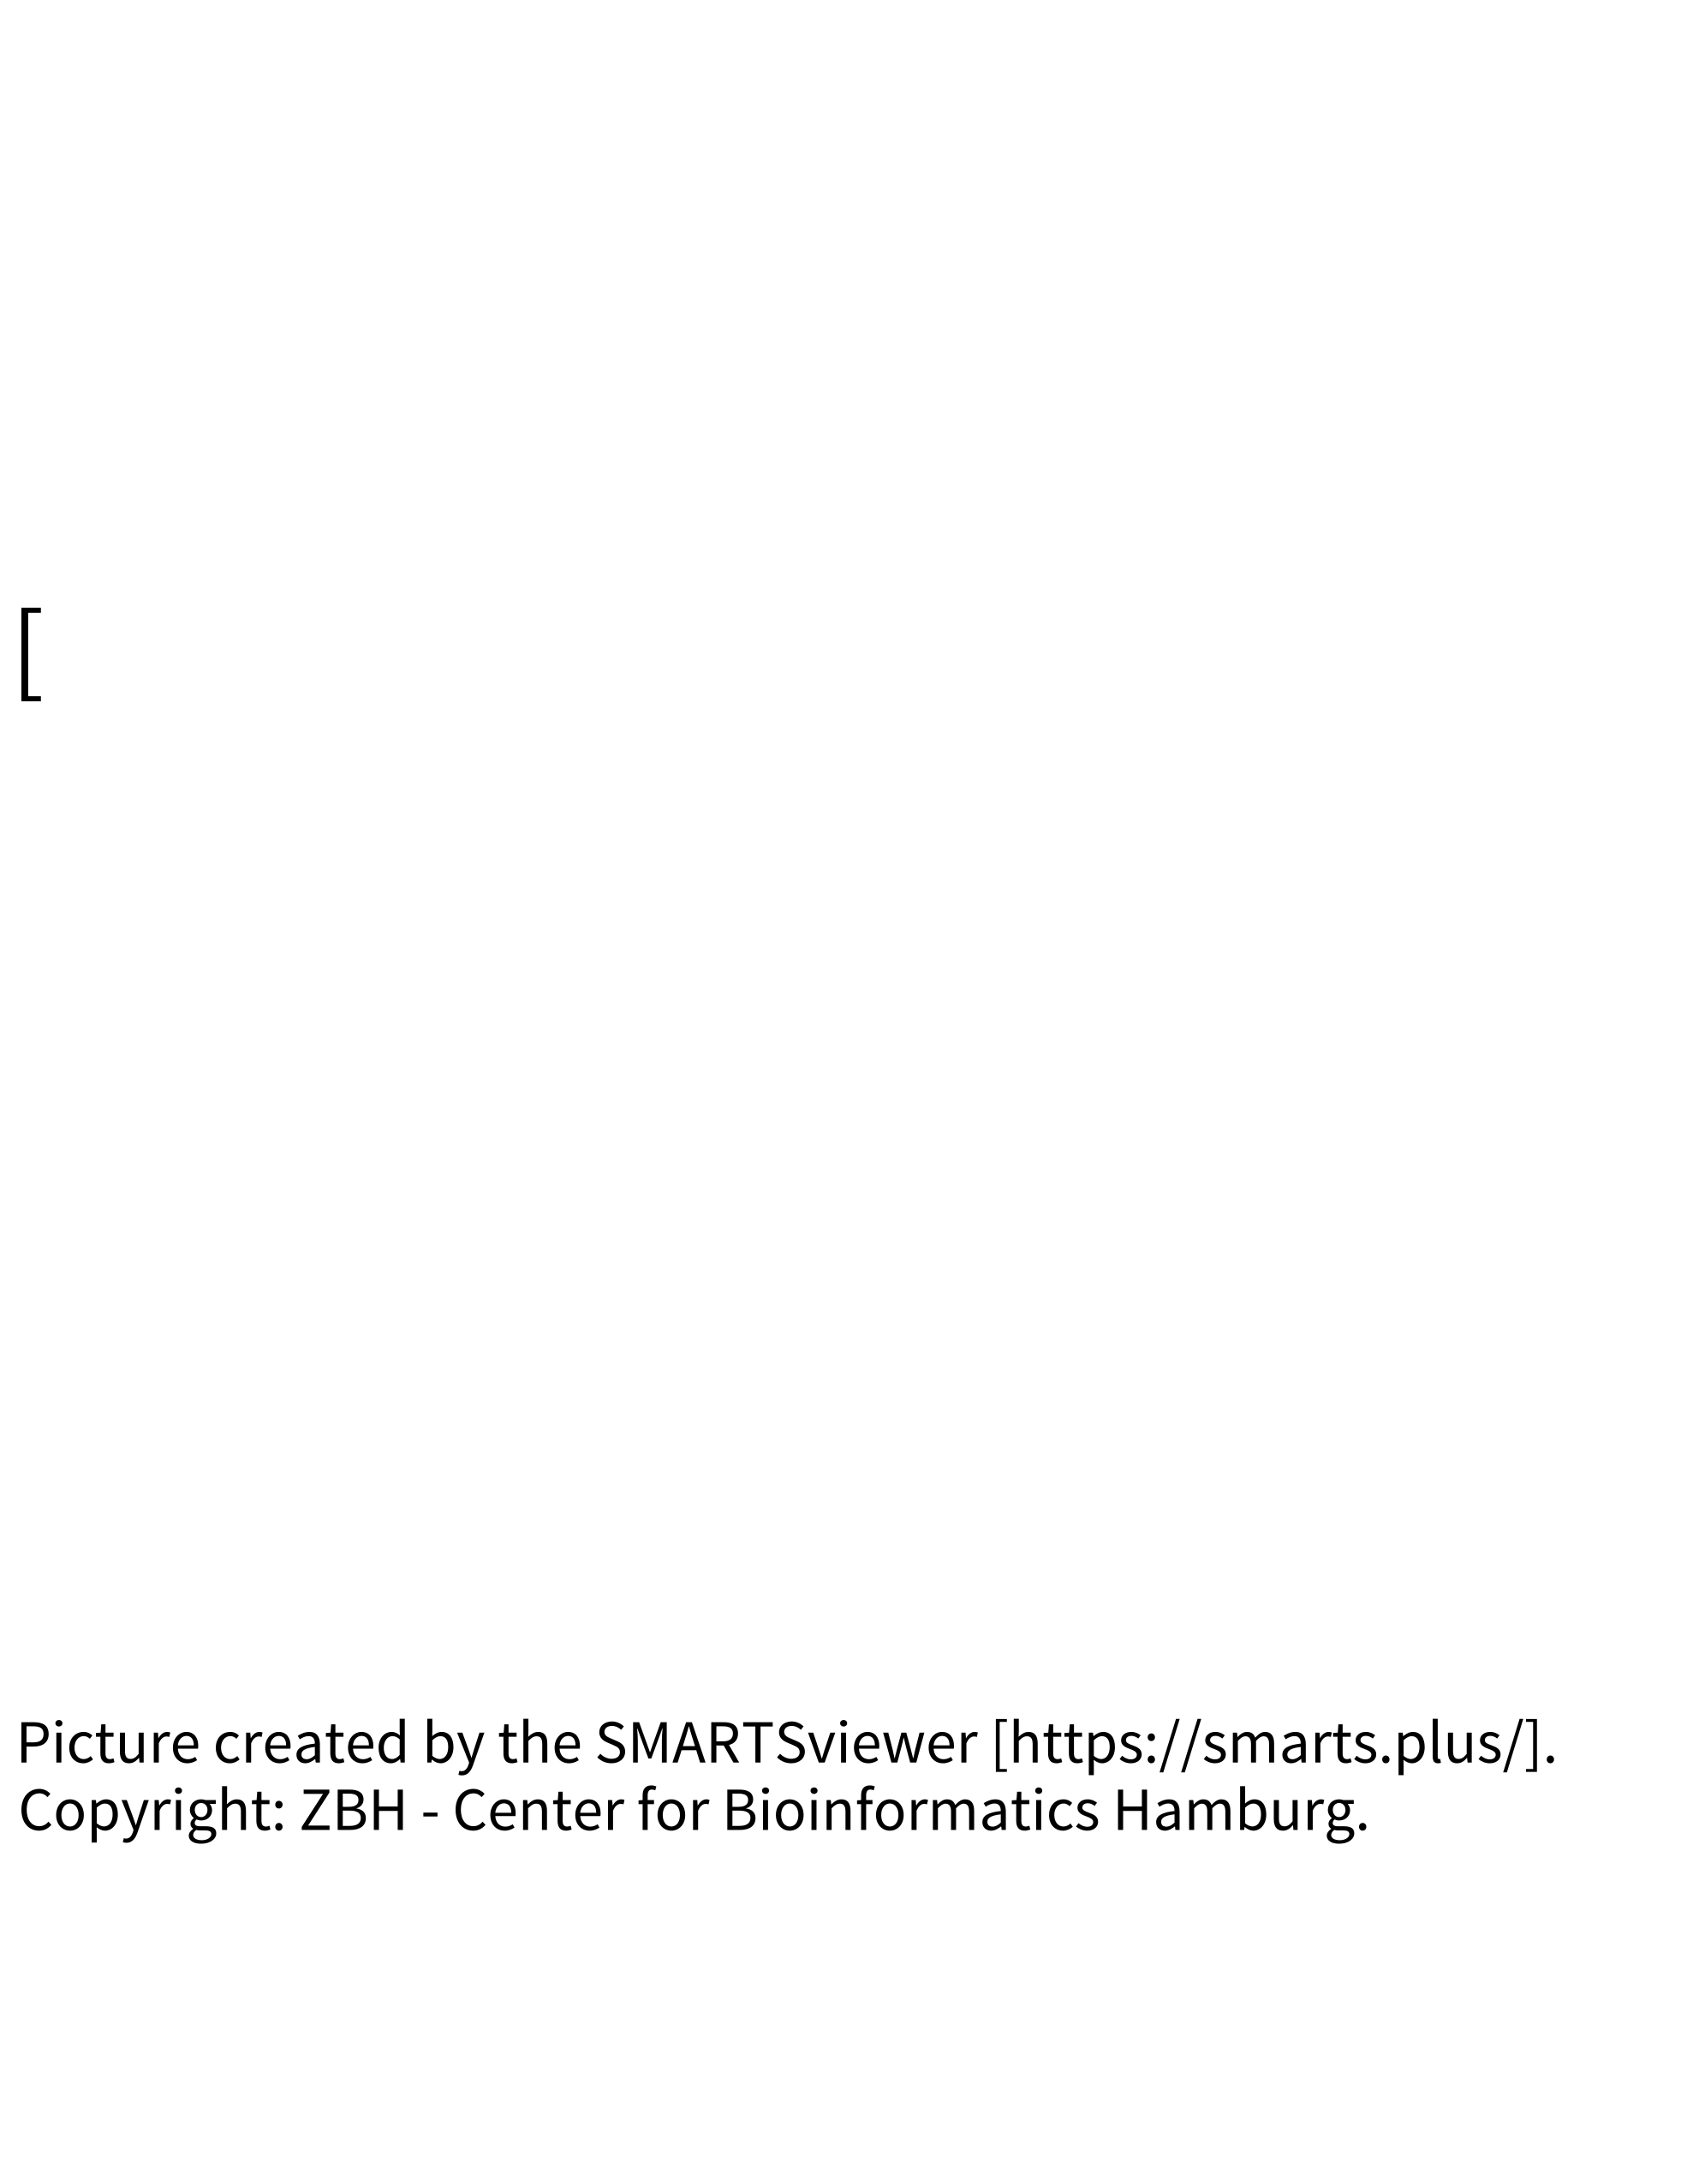

In [93]:
im2 = get_img("smarts=[#6][#6]1[#6][#6]([#6])[#6][#6]1")
im2